In [1]:
import random
import os
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
from PIL import Image
from shutil import copyfile
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.0.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17657368478098331764
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4854028697
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2554569962162990134
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
# print(os.getcwd())

# try:
#     os.mkdir(f"{getcwd()}/Images")
#     os.mkdir(f"{getcwd()}/Images/Training")
#     os.mkdir(f"{getcwd()}/Images/Training/apple_pie")
#     os.mkdir(f"{getcwd()}/Images/Training/baklava")
#     os.mkdir(f"{getcwd()}/Images/Training/beignets")
#     os.mkdir(f"{getcwd()}/Images/Training/bread_pudding")
#     os.mkdir(f"{getcwd()}/Images/Training/carrot_cake")
#     os.mkdir(f"{getcwd()}/Images/Training/cheesecake")
#     os.mkdir(f"{getcwd()}/Images/Training/chocolate_cake")
#     os.mkdir(f"{getcwd()}/Images/Training/chocolate_mousse")
#     os.mkdir(f"{getcwd()}/Images/Training/churros")
#     os.mkdir(f"{getcwd()}/Images/Training/creme_brulee")
#     os.mkdir(f"{getcwd()}/Images/Training/cup_cakes")
#     os.mkdir(f"{getcwd()}/Images/Training/donuts")
#     os.mkdir(f"{getcwd()}/Images/Training/frozen_yogurt")
#     os.mkdir(f"{getcwd()}/Images/Training/hummus")
#     os.mkdir(f"{getcwd()}/Images/Training/ice_cream")
#     os.mkdir(f"{getcwd()}/Images/Training/macarons")
#     os.mkdir(f"{getcwd()}/Images/Training/pancakes")
#     os.mkdir(f"{getcwd()}/Images/Training/panna_cotta")
#     os.mkdir(f"{getcwd()}/Images/Training/red_velvet_cake")
#     os.mkdir(f"{getcwd()}/Images/Training/strawberry_shortcake")
#     os.mkdir(f"{getcwd()}/Images/Training/tiramisu")
#     os.mkdir(f"{getcwd()}/Images/Training/waffles")

#     os.mkdir(f"{getcwd()}/Images/Validation")
#     os.mkdir(f"{getcwd()}/Images/Validation/apple_pie")
#     os.mkdir(f"{getcwd()}/Images/Validation/baklava")
#     os.mkdir(f"{getcwd()}/Images/Validation/beignets")
#     os.mkdir(f"{getcwd()}/Images/Validation/bread_pudding")
#     os.mkdir(f"{getcwd()}/Images/Validation/carrot_cake")
#     os.mkdir(f"{getcwd()}/Images/Validation/cheesecake")
#     os.mkdir(f"{getcwd()}/Images/Validation/chocolate_cake")
#     os.mkdir(f"{getcwd()}/Images/Validation/chocolate_mousse")
#     os.mkdir(f"{getcwd()}/Images/Validation/churros")
#     os.mkdir(f"{getcwd()}/Images/Validation/creme_brulee")
#     os.mkdir(f"{getcwd()}/Images/Validation/cup_cakes")
#     os.mkdir(f"{getcwd()}/Images/Validation/donuts")
#     os.mkdir(f"{getcwd()}/Images/Validation/frozen_yogurt")
#     os.mkdir(f"{getcwd()}/Images/Validation/hummus")
#     os.mkdir(f"{getcwd()}/Images/Validation/ice_cream")
#     os.mkdir(f"{getcwd()}/Images/Validation/macarons")
#     os.mkdir(f"{getcwd()}/Images/Validation/pancakes")
#     os.mkdir(f"{getcwd()}/Images/Validation/panna_cotta")
#     os.mkdir(f"{getcwd()}/Images/Validation/red_velvet_cake")
#     os.mkdir(f"{getcwd()}/Images/Validation/strawberry_shortcake")
#     os.mkdir(f"{getcwd()}/Images/Validation/tiramisu")
#     os.mkdir(f"{getcwd()}/Images/Validation/waffles")
    
# except OSError as error:
#     print(error)


In [3]:
BASE_SOURCE_DIR = f"{getcwd()}/Dataset"
BASE_SOURCE_DIR_IMAGES = f"{getcwd()}/Images/Training"
BASE_SOURCE_DIR_IMAGES_VAL = f"{getcwd()}/Images/Validation"

# SOURCE_DIR_ARR = [os.path.join(BASE_SOURCE_DIR,'apple_pie'), os.path.join(BASE_SOURCE_DIR,'baklava'), os.path.join(BASE_SOURCE_DIR,'beignets'),
#                  os.path.join(BASE_SOURCE_DIR,'bread_pudding'), os.path.join(BASE_SOURCE_DIR,'carrot_cake'),os.path.join(BASE_SOURCE_DIR,'cheesecake'),
#                  os.path.join(BASE_SOURCE_DIR,'chocolate_cake'), os.path.join(BASE_SOURCE_DIR,'chocolate_mousse'), os.path.join(BASE_SOURCE_DIR,'churros'),
#                  os.path.join(BASE_SOURCE_DIR,'creme_brulee'), os.path.join(BASE_SOURCE_DIR,'cup_cakes'), os.path.join(BASE_SOURCE_DIR,'donuts'),
#                  os.path.join(BASE_SOURCE_DIR,'frozen_yogurt'), os.path.join(BASE_SOURCE_DIR,'hummus'), os.path.join(BASE_SOURCE_DIR,'ice_cream'),
#                  os.path.join(BASE_SOURCE_DIR,'macarons'), os.path.join(BASE_SOURCE_DIR,'pancakes'), os.path.join(BASE_SOURCE_DIR,'panna_cotta'),
#                  os.path.join(BASE_SOURCE_DIR,'red_velvet_cake'),os.path.join(BASE_SOURCE_DIR,'strawberry_shortcake'), os.path.join(BASE_SOURCE_DIR,'tiramisu'), 
#                  os.path.join(BASE_SOURCE_DIR,'waffles')]

# TRAINING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES,'apple_pie'), os.path.join(BASE_SOURCE_DIR_IMAGES,'baklava'), os.path.join(BASE_SOURCE_DIR_IMAGES,'beignets'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'bread_pudding'), os.path.join(BASE_SOURCE_DIR_IMAGES,'carrot_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES,'cheesecake'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'chocolate_cake'), os.path.join(BASE_SOURCE_DIR_IMAGES,'chocolate_mousse'), os.path.join(BASE_SOURCE_DIR_IMAGES,'churros'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'creme_brulee'), os.path.join(BASE_SOURCE_DIR_IMAGES,'cup_cakes'), os.path.join(BASE_SOURCE_DIR_IMAGES,'donuts'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'frozen_yogurt'), os.path.join(BASE_SOURCE_DIR_IMAGES,'hummus'), os.path.join(BASE_SOURCE_DIR_IMAGES,'ice_cream'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'macarons'), os.path.join(BASE_SOURCE_DIR_IMAGES,'pancakes'), os.path.join(BASE_SOURCE_DIR_IMAGES,'panna_cotta'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'red_velvet_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES,'strawberry_shortcake'), os.path.join(BASE_SOURCE_DIR_IMAGES,'tiramisu'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'waffles')]
                    
# TESTING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'apple_pie'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'baklava'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'beignets'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'bread_pudding'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'carrot_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'cheesecake'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'chocolate_cake'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'chocolate_mousse'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'churros'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'creme_brulee'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'cup_cakes'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'donuts'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'frozen_yogurt'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'hummus'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'ice_cream'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'macarons'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'pancakes'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'panna_cotta'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'red_velvet_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'strawberry_shortcake'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'tiramisu'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'waffles')]

# #MARK - Dividing data method
# #============================================================================================================
# #External Params:
# #Source     : String = Direktori untuk masing" kelas source, digunakan sebagai tempat foto sebelum di split.
# #TRAINING   : String = Direktori akhir TRAINING untuk masing" kelas.
# #VALIDATION : String = DIrektori AKHIR Testing untuk masing" Kelas.
# #SPLIT_SIZE : Double = Menentukan persentase pembagian data source ke 2 directory di atas.
# #============================================================================================================
# def divide_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    
#     #Creating Limiter
#     Shuffled = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
#     SIZE = len(Shuffled)
#     SPLIT_BOUNDARIES = SIZE * SPLIT_SIZE
#     SPLIT_BOUNDARIES = round(SPLIT_BOUNDARIES)
    
#     #Copy the divided source files to the training directory
#     src_training_files = Shuffled[:SPLIT_BOUNDARIES]
#     for training_file in src_training_files:
#         full_training_file = os.path.join(SOURCE,training_file)
#         if os.path.isfile(full_training_file):
#             if os.path.getsize(full_training_file)!=0:
#                 destination_dir = shutil.copy(full_training_file,TRAINING)
#                 image = Image.open(destination_dir)
#                 new_image = image.resize((200, 200))
#                 new_image.save(destination_dir)
               
                
#     #Copy the divided source files to the training directory           
#     src_testing = Shuffled[SPLIT_BOUNDARIES:] 
#     for testing_file in src_testing:
#         full_testing_file = os.path.join(SOURCE,testing_file)
#         if os.path.isfile(full_testing_file):
#             if os.path.getsize(full_testing_file)!=0:
#                 destination_dir = shutil.copy(full_testing_file,VALIDATION)
#                 image = Image.open(destination_dir)
#                 new_image = image.resize((200, 200))
#                 new_image.save(destination_dir)

# CLASS_SIZE = len(SOURCE_DIR_ARR)
# SPLIT_SIZE = .8

# for index in range(CLASS_SIZE):
#     divide_data(SOURCE_DIR_ARR[index], TRAINING_DIR_ARR[index], TESTING_DIR_ARR[index],SPLIT_SIZE)

# print(len(os.listdir(SOURCE_DIR_ARR[0])))
# print(len(os.listdir(TRAINING_DIR_ARR[0])))
# print(len(os.listdir(TESTING_DIR_ARR[0])))


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 30,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,                                  
                                   zoom_range = 0.3,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(200, 200),  
                  batch_size=256,
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(200,200), 
                      batch_size=256,
                      class_mode='categorical'
                     )

Found 17600 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(22, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()
for layer in model.layers:
    print(layer.output_shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0

In [6]:
history = model.fit(train_generator,
                     epochs=100,
                     verbose=1,
                     validation_data=validation_generator)

Train for 69 steps, validate for 18 steps
Epoch 1/100
69/69 [==============================] - 155s 2s/step - loss: 3.0760 - accuracy: 0.0570 - val_loss: 3.0260 - val_accuracy: 0.0820
Epoch 2/100
69/69 [==============================] - 148s 2s/step - loss: 3.0149 - accuracy: 0.0840 - val_loss: 2.9372 - val_accuracy: 0.1239
Epoch 3/100
69/69 [==============================] - 148s 2s/step - loss: 2.9405 - accuracy: 0.1091 - val_loss: 2.8631 - val_accuracy: 0.1339
Epoch 4/100
69/69 [==============================] - 148s 2s/step - loss: 2.8917 - accuracy: 0.1266 - val_loss: 2.7923 - val_accuracy: 0.1614
Epoch 5/100
69/69 [==============================] - 148s 2s/step - loss: 2.8631 - accuracy: 0.1364 - val_loss: 2.7475 - val_accuracy: 0.1698
Epoch 6/100
69/69 [==============================] - 148s 2s/step - loss: 2.8245 - accuracy: 0.1470 - val_loss: 2.7111 - val_accuracy: 0.1855
Epoch 7/100
69/69 [==============================] - 148s 2s/step - loss: 2.7788 - accuracy: 0.1582 - val_

69/69 [==============================] - 147s 2s/step - loss: 1.9387 - accuracy: 0.4152 - val_loss: 1.7829 - val_accuracy: 0.4718
Epoch 59/100
69/69 [==============================] - 147s 2s/step - loss: 1.9220 - accuracy: 0.4255 - val_loss: 1.8637 - val_accuracy: 0.4489
Epoch 60/100
69/69 [==============================] - 147s 2s/step - loss: 1.9174 - accuracy: 0.4272 - val_loss: 1.7730 - val_accuracy: 0.4709
Epoch 61/100
69/69 [==============================] - 147s 2s/step - loss: 1.9158 - accuracy: 0.4268 - val_loss: 1.7116 - val_accuracy: 0.4977
Epoch 62/100
69/69 [==============================] - 147s 2s/step - loss: 1.8938 - accuracy: 0.4287 - val_loss: 1.7519 - val_accuracy: 0.4775
Epoch 63/100
69/69 [==============================] - 147s 2s/step - loss: 1.9045 - accuracy: 0.4312 - val_loss: 1.7770 - val_accuracy: 0.4700
Epoch 64/100
69/69 [==============================] - 147s 2s/step - loss: 1.9067 - accuracy: 0.4246 - val_loss: 1.7172 - val_accuracy: 0.4882
Epoch 65/100

Text(0.5, 1.0, 'Training and validation loss')

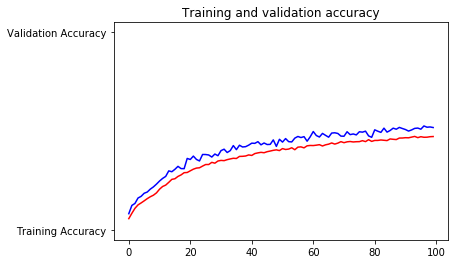

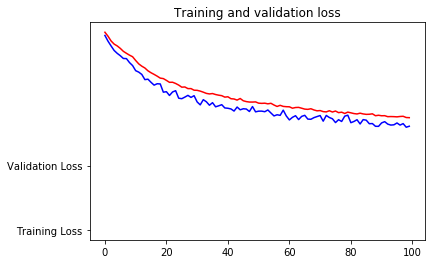

In [7]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [8]:
model = model.save(f"{getcwd()}/CoreML.h5")

In [9]:
model = tf.keras.models.load_model(f"{getcwd()}/CoreML.h5")

In [10]:
history = model.fit(train_generator,
                     epochs=100,
                     verbose=1,
                     validation_data=validation_generator)

Train for 69 steps, validate for 18 steps
Epoch 1/100
69/69 [==============================] - 147s 2s/step - loss: 1.7714 - accuracy: 0.4625 - val_loss: 1.6100 - val_accuracy: 0.5275
Epoch 2/100
69/69 [==============================] - 147s 2s/step - loss: 1.7568 - accuracy: 0.4741 - val_loss: 1.6568 - val_accuracy: 0.5002
Epoch 3/100
69/69 [==============================] - 147s 2s/step - loss: 1.7527 - accuracy: 0.4718 - val_loss: 1.6974 - val_accuracy: 0.4980
Epoch 4/100
69/69 [==============================] - 147s 2s/step - loss: 1.7427 - accuracy: 0.4733 - val_loss: 1.5837 - val_accuracy: 0.5357
Epoch 5/100
69/69 [==============================] - 147s 2s/step - loss: 1.7371 - accuracy: 0.4722 - val_loss: 1.6083 - val_accuracy: 0.5302
Epoch 6/100
69/69 [==============================] - 147s 2s/step - loss: 1.7352 - accuracy: 0.4725 - val_loss: 1.6587 - val_accuracy: 0.5161
Epoch 7/100
69/69 [==============================] - 147s 2s/step - loss: 1.7436 - accuracy: 0.4739 - val_

69/69 [==============================] - 147s 2s/step - loss: 1.6435 - accuracy: 0.5021 - val_loss: 1.5345 - val_accuracy: 0.5545
Epoch 59/100
69/69 [==============================] - 147s 2s/step - loss: 1.6432 - accuracy: 0.5023 - val_loss: 1.5908 - val_accuracy: 0.5382
Epoch 60/100
69/69 [==============================] - 147s 2s/step - loss: 1.6380 - accuracy: 0.5077 - val_loss: 1.5535 - val_accuracy: 0.5461
Epoch 61/100
69/69 [==============================] - 147s 2s/step - loss: 1.6452 - accuracy: 0.5043 - val_loss: 1.5705 - val_accuracy: 0.5361
Epoch 62/100
69/69 [==============================] - 147s 2s/step - loss: 1.6388 - accuracy: 0.5069 - val_loss: 1.5406 - val_accuracy: 0.5475
Epoch 63/100
69/69 [==============================] - 147s 2s/step - loss: 1.6432 - accuracy: 0.5017 - val_loss: 1.5804 - val_accuracy: 0.5355
Epoch 64/100
69/69 [==============================] - 147s 2s/step - loss: 1.6417 - accuracy: 0.4989 - val_loss: 1.6049 - val_accuracy: 0.5314
Epoch 65/100

Text(0.5, 1.0, 'Training and validation loss')

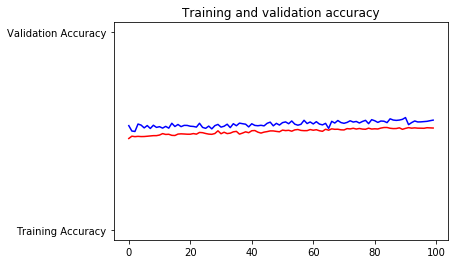

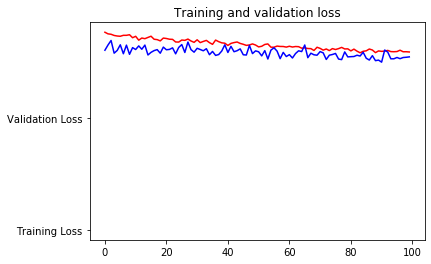

In [11]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [12]:
model = model.save(f"{getcwd()}/CoreML.h5")

In [13]:
model = tf.keras.models.load_model(f"{getcwd()}/CoreML.h5")

In [14]:
history = model.fit(train_generator,
                     epochs=100,
                     verbose=1,
                     validation_data=validation_generator)

Train for 69 steps, validate for 18 steps
Epoch 1/100
69/69 [==============================] - 148s 2s/step - loss: 1.5990 - accuracy: 0.5157 - val_loss: 1.5260 - val_accuracy: 0.5589
Epoch 2/100
69/69 [==============================] - 147s 2s/step - loss: 1.5865 - accuracy: 0.5203 - val_loss: 1.5719 - val_accuracy: 0.5505
Epoch 3/100
69/69 [==============================] - 147s 2s/step - loss: 1.5580 - accuracy: 0.5303 - val_loss: 1.6456 - val_accuracy: 0.5298
Epoch 4/100
69/69 [==============================] - 147s 2s/step - loss: 1.5739 - accuracy: 0.5208 - val_loss: 1.4887 - val_accuracy: 0.5634 1.5772 - accu
Epoch 5/100
69/69 [==============================] - 147s 2s/step - loss: 1.5874 - accuracy: 0.5216 - val_loss: 1.5282 - val_accuracy: 0.5516
Epoch 6/100
69/69 [==============================] - 147s 2s/step - loss: 1.5813 - accuracy: 0.5248 - val_loss: 1.5357 - val_accuracy: 0.5545
Epoch 7/100
69/69 [==============================] - 147s 2s/step - loss: 1.5778 - accuracy:

69/69 [==============================] - 147s 2s/step - loss: 1.5391 - accuracy: 0.5348 - val_loss: 1.5096 - val_accuracy: 0.5618
Epoch 58/100
69/69 [==============================] - 147s 2s/step - loss: 1.5422 - accuracy: 0.5353 - val_loss: 1.5303 - val_accuracy: 0.5620
Epoch 59/100
69/69 [==============================] - 147s 2s/step - loss: 1.5472 - accuracy: 0.5354 - val_loss: 1.5508 - val_accuracy: 0.5555
Epoch 60/100
69/69 [==============================] - 147s 2s/step - loss: 1.5319 - accuracy: 0.5319 - val_loss: 1.4811 - val_accuracy: 0.5695
Epoch 61/100
69/69 [==============================] - 147s 2s/step - loss: 1.5440 - accuracy: 0.5305 - val_loss: 1.5198 - val_accuracy: 0.5589
Epoch 62/100
69/69 [==============================] - 147s 2s/step - loss: 1.5549 - accuracy: 0.5300 - val_loss: 1.5152 - val_accuracy: 0.5625
Epoch 63/100
69/69 [==============================] - 147s 2s/step - loss: 1.5319 - accuracy: 0.5335 - val_loss: 1.5256 - val_accuracy: 0.5666
Epoch 64/100

Text(0.5, 1.0, 'Training and validation loss')

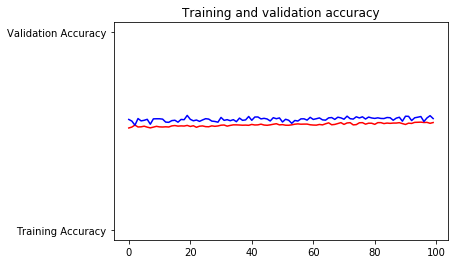

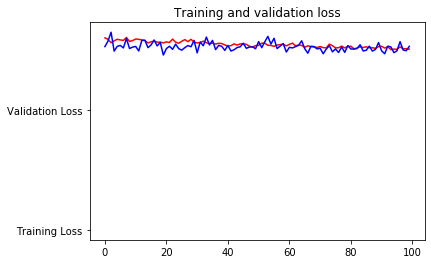

In [15]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 30,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,                                  
                                   zoom_range = 0.3,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(200, 200),  
                  batch_size=512,
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(200,200), 
                      batch_size=512,
                      class_mode='categorical'
                     )

Found 17600 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.


AttributeError: 'NoneType' object has no attribute 'save'

In [19]:
model = tf.keras.models.load_model(f"{getcwd()}/CoreML.h5")

In [ ]:
history = model.fit(train_generator,
                     epochs=200,
                     verbose=1,
                     validation_data=validation_generator)

Train for 35 steps, validate for 9 steps
Epoch 1/200
35/35 [==============================] - 152s 4s/step - loss: 1.4608 - accuracy: 0.5582 - val_loss: 1.4631 - val_accuracy: 0.5830
Epoch 2/200
35/35 [==============================] - 149s 4s/step - loss: 1.4583 - accuracy: 0.5561 - val_loss: 1.4693 - val_accuracy: 0.5850
Epoch 3/200
35/35 [==============================] - 149s 4s/step - loss: 1.4713 - accuracy: 0.5525 - val_loss: 1.4643 - val_accuracy: 0.5782
Epoch 4/200
35/35 [==============================] - 148s 4s/step - loss: 1.4409 - accuracy: 0.5572 - val_loss: 1.4659 - val_accuracy: 0.5770
Epoch 5/200
35/35 [==============================] - 148s 4s/step - loss: 1.4345 - accuracy: 0.5609 - val_loss: 1.4390 - val_accuracy: 0.5886
Epoch 6/200
35/35 [==============================] - 148s 4s/step - loss: 1.4361 - accuracy: 0.5644 - val_loss: 1.4489 - val_accuracy: 0.5832
Epoch 7/200
35/35 [==============================] - 148s 4s/step - loss: 1.4353 - accuracy: 0.5622 - val_l

35/35 [==============================] - 147s 4s/step - loss: 1.3999 - accuracy: 0.5705 - val_loss: 1.4838 - val_accuracy: 0.5859
Epoch 59/200
35/35 [==============================] - 147s 4s/step - loss: 1.4057 - accuracy: 0.5690 - val_loss: 1.4427 - val_accuracy: 0.5882
Epoch 60/200
35/35 [==============================] - 147s 4s/step - loss: 1.4022 - accuracy: 0.5700 - val_loss: 1.5169 - val_accuracy: 0.5757
Epoch 61/200
35/35 [==============================] - 148s 4s/step - loss: 1.4091 - accuracy: 0.5700 - val_loss: 1.4683 - val_accuracy: 0.5798
Epoch 62/200
35/35 [==============================] - 148s 4s/step - loss: 1.3877 - accuracy: 0.5747 - val_loss: 1.4366 - val_accuracy: 0.5880
Epoch 63/200
35/35 [==============================] - 147s 4s/step - loss: 1.3928 - accuracy: 0.5780 - val_loss: 1.4658 - val_accuracy: 0.5882
Epoch 64/200
35/35 [==============================] - 147s 4s/step - loss: 1.4129 - accuracy: 0.5708 - val_loss: 1.4659 - val_accuracy: 0.5780
Epoch 65/200